Nama:

In [2]:
print("Rahman Aziz Firmansyah")

Rahman Aziz Firmansyah


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, OneHotEncoder, PolynomialFeatures
from sklearn.feature_selection import mutual_info_classif, SelectKBest, VarianceThreshold, mutual_info_regression
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, precision_recall_curve, roc_auc_score, roc_curve, r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import spearmanr
from xgboost import XGBClassifier, XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time

(1) Split X, y dari dataset churn. y = average utilization ratio

In [4]:
churn = pd.read_csv('churn.csv')
churn.drop('CLIENTNUM', axis=1, inplace=True)
churn.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
X = churn.select_dtypes('number').drop('Avg_Utilization_Ratio', axis=1)
y = churn['Avg_Utilization_Ratio']

(2) Split trainset dan testset. test size = 0.2.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(3) Lakukan transformasi yang diperlukan pada trainset. Lakukan transformasi serupa pada testset tanpa fitting ulang.

In [7]:
minmax = MinMaxScaler()
X_train_scaled = pd.DataFrame(minmax.fit_transform(X_train), columns=minmax.feature_names_in_)
X_test_scaled = pd.DataFrame(minmax.transform(X_test), columns=minmax.feature_names_in_)

(4) Siapkan 3 regressor learning alg.: decision tree regressor, random forest regressor, dan xgboost regressor. Dengan menggunakan cross validation tentukan berbagai hyperparameter yang optimal. Buat 6 model (3 model default dan 3 model optimized)

In [8]:
#model regressor default
tree_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
xg_reg = XGBRegressor()

In [9]:
#fitting training data pada model
tree_reg.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [10]:
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [11]:
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

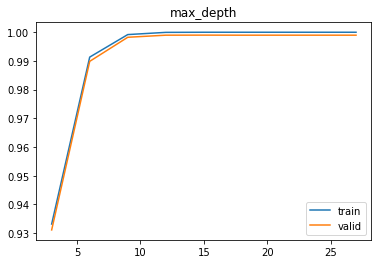

15

In [12]:
#mencari parameter optimal untuk ketiga model
params = np.arange(3, 30, 3)
train = []
valid = []

for par in params:
    result = cross_validate(DecisionTreeRegressor(random_state=42,
                                                 max_depth=par), 
                            X_train_scaled, y_train, cv=5, scoring = 'r2', return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('max_depth')
plt.show()
max_depth_fin = params[np.argmax(valid)]
max_depth_fin

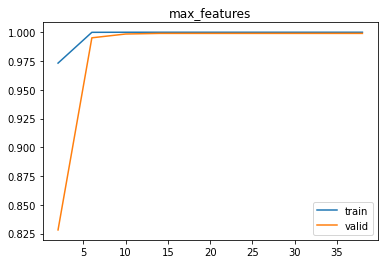

14

In [13]:
params = np.arange(2, 40, 4)
train = []
valid = []

for par in params:
    result = cross_validate(DecisionTreeRegressor(random_state=42,
                                                 max_depth=max_depth_fin, 
                                                 max_features=par), 
                            X_train_scaled, y_train, cv=5, scoring = 'r2', return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('max_features')
plt.show()
max_ft_fin = params[np.argmax(valid)]
max_ft_fin

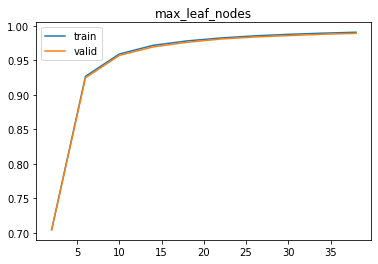

38

In [14]:
params = np.arange(2, 40, 4)
train = []
valid = []

for par in params:
    result = cross_validate(DecisionTreeRegressor(random_state=42,
                                                 max_depth=max_depth_fin, 
                                                 max_features=max_ft_fin, 
                                                 max_leaf_nodes=par), 
                            X_train_scaled, y_train, cv=5, scoring = 'r2', return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('max_leaf_nodes')
plt.show()
max_leaf_nodes_fin = params[np.argmax(valid)]
max_leaf_nodes_fin

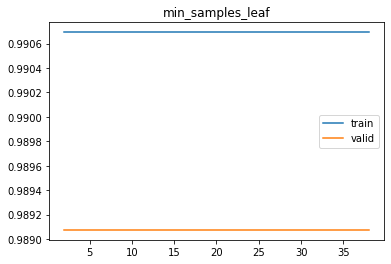

2

In [15]:
params = np.arange(2, 40, 4)
train = []
valid = []

for par in params:
    result = cross_validate(DecisionTreeRegressor(random_state=42,
                                                 max_depth=max_depth_fin, 
                                                 max_features=max_ft_fin, 
                                                 max_leaf_nodes=max_leaf_nodes_fin), 
                            X_train_scaled, y_train, cv=5, scoring = 'r2', return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('min_samples_leaf')
plt.show()
min_samples_leaf_fin = params[np.argmax(valid)]
min_samples_leaf_fin

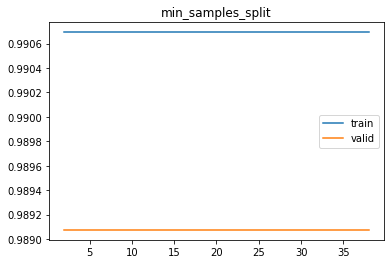

2

In [16]:
params = np.arange(2, 40, 4)
train = []
valid = []

for par in params:
    result = cross_validate(DecisionTreeRegressor(random_state=42,
                                                 max_depth=max_depth_fin, 
                                                 max_features=max_ft_fin, 
                                                 max_leaf_nodes=max_leaf_nodes_fin, 
                                                 min_samples_leaf=min_samples_leaf_fin,
                                                 min_samples_split=par), 
                            X_train_scaled, y_train, cv=5, scoring = 'r2', return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('min_samples_split')
plt.show()
min_samples_split_fin = params[np.argmax(valid)]
min_samples_split_fin

In [17]:
#model tree regressor optimized
tree_reg_opt = DecisionTreeRegressor(max_depth=max_depth_fin, max_features=max_ft_fin, max_leaf_nodes=max_leaf_nodes_fin,
min_samples_leaf=min_samples_leaf_fin, min_samples_split=min_samples_split_fin)

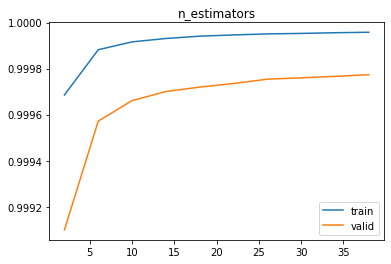

38

In [18]:
#optimasi parameter random forest regressor
params = np.arange(2, 40, 4)
train = []
valid = []

for par in params:
    result = cross_validate(RandomForestRegressor(random_state=42,
                                                 n_estimators=par), 
                            X_train_scaled, y_train, cv=5, scoring = 'r2', return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('n_estimators')
plt.show()
n_est_rf = params[np.argmax(valid)]
n_est_rf

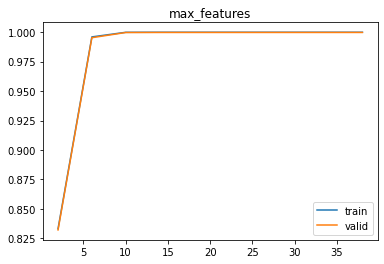

18

In [19]:
params = np.arange(2, 40, 4)
train = []
valid = []

for par in params:
    result = cross_validate(RandomForestRegressor(random_state=42,
                                                 n_estimators=n_est_rf,
                                                 max_depth=par), 
                            X_train_scaled, y_train, cv=5, scoring = 'r2', return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('max_features')
plt.show()
max_depth_rf = params[np.argmax(valid)]
max_depth_rf

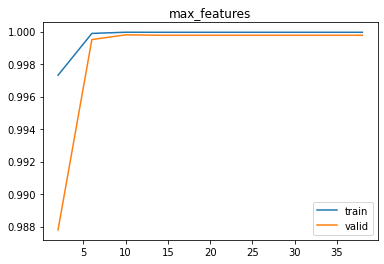

10

In [21]:
params = np.arange(2, 40, 4)
train = []
valid = []

for par in params:
    result = cross_validate(RandomForestRegressor(random_state=42,
                                                 n_estimators=n_est_rf,
                                                 max_depth=max_depth_rf,
                                                 max_features=par), 
                            X_train_scaled, y_train, cv=5, scoring = 'r2', return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('max_features')
plt.show()
max_features_rf = params[np.argmax(valid)]
max_features_rf

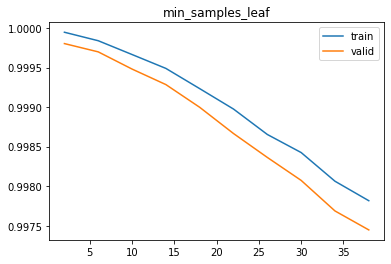

2

In [22]:
params = np.arange(2, 40, 4)
train = []
valid = []

for par in params:
    result = cross_validate(RandomForestRegressor(random_state=42,
                                                 n_estimators=n_est_rf,
                                                 max_depth=max_depth_rf,
                                                 max_features=max_features_rf, 
                                                 min_samples_leaf=par), 
                            X_train_scaled, y_train, cv=5, scoring = 'r2', return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('min_samples_leaf')
plt.show()
min_samples_leaf_rf = params[np.argmax(valid)]
min_samples_leaf_rf

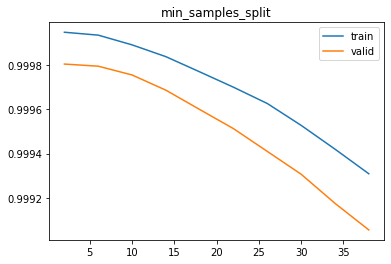

2

In [23]:
params = np.arange(2, 40, 4)
train = []
valid = []

for par in params:
    result = cross_validate(RandomForestRegressor(random_state=42,
                                                 n_estimators=n_est_rf,
                                                 max_depth=max_depth_rf,
                                                 max_features=max_features_rf, 
                                                 min_samples_leaf=min_samples_leaf_rf,
                                                 min_samples_split=par), 
                            X_train_scaled, y_train, cv=5, scoring = 'r2', return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('min_samples_split')
plt.show()
min_samples_split_rf = params[np.argmax(valid)]
min_samples_split_rf

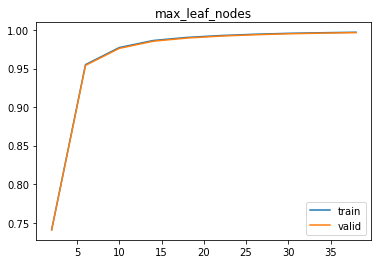

38

In [24]:
params = np.arange(2, 40, 4)
train = []
valid = []

for par in params:
    result = cross_validate(RandomForestRegressor(random_state=42,
                                                 n_estimators=n_est_rf,
                                                 max_depth=max_depth_rf,
                                                 max_features=max_features_rf, 
                                                 min_samples_leaf=min_samples_leaf_rf,
                                                 min_samples_split=min_samples_split_rf,
                                                 max_leaf_nodes=par), 
                            X_train_scaled, y_train, cv=5, scoring = 'r2', return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('max_leaf_nodes')
plt.show()
max_leaf_nodes_rf = params[np.argmax(valid)]
max_leaf_nodes_rf

In [25]:
#model random forest regressor optimized
rf_opt = RandomForestRegressor(n_estimators=n_est_rf, max_depth=max_depth_rf, max_features=max_features_rf,
max_leaf_nodes=max_leaf_nodes_rf, min_samples_leaf=min_samples_leaf_rf, min_samples_split=min_samples_split_rf)

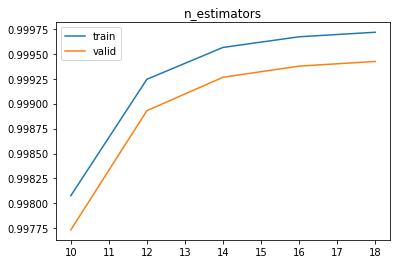

18

In [33]:
#menentukan parameter untuk xgboost regressor
params = np.arange(10, 20, 2)
train = []
valid = []

for par in params:
    result = cross_validate(XGBRegressor(random_state=42,
                                                 n_estimators=par), 
                            X_train_scaled, y_train, cv=5, scoring = 'r2', return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('n_estimators')
plt.show()
n_est_xg = params[np.argmax(valid)]
n_est_xg

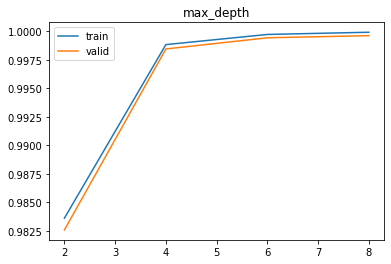

8

In [35]:
params = np.arange(2, 10, 2)
train = []
valid = []

for par in params:
    result = cross_validate(XGBRegressor(random_state=42,
                                                 n_estimators=n_est_xg,
                                                 max_depth=par), 
                            X_train_scaled, y_train, cv=5, scoring = 'r2', return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('max_depth')
plt.show()
max_depth_xg = params[np.argmax(valid)]
max_depth_xg

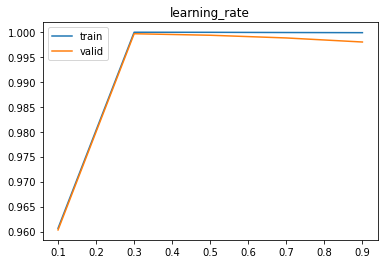

0.30000000000000004

In [36]:
params = np.arange(0.1, 1, 0.2)
train = []
valid = []

for par in params:
    result = cross_validate(XGBRegressor(random_state=42,
                                                 n_estimators=n_est_xg,
                                                 max_depth=max_depth_xg,
                                                 learning_rate=par), 
                            X_train_scaled, y_train, cv=5, scoring = 'r2', return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('learning_rate')
plt.show()
lr_xg = params[np.argmax(valid)]
lr_xg

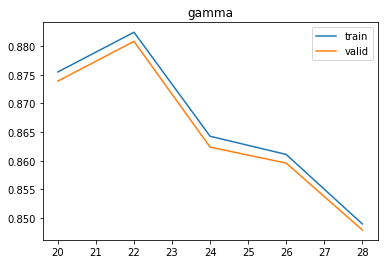

22

In [37]:
params = np.arange(20, 30, 2)
train = []
valid = []

for par in params:
    result = cross_validate(XGBRegressor(random_state=42,
                                                 n_estimators=n_est_xg,
                                                 max_depth=max_depth_xg,
                                                 learning_rate=lr_xg,
                                                 gamma=par), 
                            X_train_scaled, y_train, cv=5, scoring = 'r2', return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('gamma')
plt.show()
gamma_xg = params[np.argmax(valid)]
gamma_xg

In [38]:
#model xgboost regressor optimized
xg_reg_opt = XGBRegressor(n_estimators=n_est_xg, max_depth=max_depth_xg, learning_rate=lr_xg, gamma=gamma_xg)

In [39]:
tree_reg_opt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=15, max_features=14, max_leaf_nodes=38,
                      min_samples_leaf=2)

In [40]:
rf_opt.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=18, max_features=10, max_leaf_nodes=38,
                      min_samples_leaf=2, n_estimators=38)

In [41]:
xg_reg_opt.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=22, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.30000000000000004, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=8, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=18, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, ...)

(5) Print metrics r2, mse, rmse, mae untuk keenam model (trainset vs testset) (dt vs rf vs xgb) dalam bentuk dataframe. Model mana yang menurut Anda paling baik untuk memprediksi label pada kasus ini? Apa alasannya?

In [42]:
import regres

In [43]:
regres.regres2(X_train_scaled, y_train, [tree_reg, tree_reg_opt, rf_reg, rf_opt, xg_reg, xg_reg_opt], 
['tree_reg', 'tree_reg_opt', 'rf_reg', 'rf_opt', 'xg_reg', 'xg_reg_opt'])

,r2,mse,rmse,mape,mae
tree_reg,1.000000,2.566995e-35,5.066552e-18,4.577637e-18,4.865192e-19
tree_reg_opt,0.990612,7.077574e-04,2.660371e-02,7.192915e+11,1.838251e-02
rf_reg,0.999976,1.820607e-06,1.349299e-03,3.604072e-03,7.381496e-04
rf_opt,0.997080,2.201835e-04,1.483858e-02,1.683323e+12,1.014985e-02
xg_reg,-6.286342,5.493393e-01,7.411743e-01,1.061720e+15,6.885245e-01
xg_reg_opt,0.898513,7.651414e-03,8.747236e-02,7.724765e+13,7.222414e-02


In [44]:
regres.regres2(X_test_scaled, y_test, [tree_reg, tree_reg_opt, rf_reg, rf_opt, xg_reg, xg_reg_opt], 
['tree_reg', 'tree_reg_opt', 'rf_reg', 'rf_opt', 'xg_reg', 'xg_reg_opt'])

,r2,mse,rmse,mape,mae
tree_reg,0.999313,0.000054,0.007336,1.917346e-02,0.004413
tree_reg_opt,0.989697,0.000807,0.028414,7.009228e+11,0.019636
rf_reg,0.999878,0.000010,0.003093,9.348804e-03,0.001843
rf_opt,0.996914,0.000242,0.015550,1.648218e+12,0.010715
xg_reg,-5.899609,0.540655,0.735292,1.034641e+15,0.679990
xg_reg_opt,0.895878,0.008159,0.090327,7.527497e+13,0.074321


Decision tree regressor tanpa tuning memiliki performa paling baik untuk dataset ini karena memiliki nilai r-squared training dan testing set yang tinggi.